In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Acquisation and preprocessed the data

In [83]:
df = pd.read_csv('/content/data0 (1).txt',index_col=None)

In [84]:
df_new = df.T

In [85]:
df_new.reset_index(inplace=True)

In [86]:
df_new.rename(columns = {'index': 'motor_reading'},inplace=True)

In [87]:
df_new

,motor_reading
0,0
1,0.1
2,0.2
3,0.3
4,0.4
...,...
9996,248.959
9997,128.1255
9998,0.6117
9999,0.6118


In [88]:
df_new.drop(index = [10000], axis=0,inplace=True)

In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   motor_reading  10000 non-null  object
dtypes: object(1)
memory usage: 156.2+ KB


In [90]:
df_new.head()

,motor_reading
0,0
1,0.1
2,0.2
3,0.3
4,0.4


# Try with Unsupervised Clustring Techniques

In [91]:
# Optimal number of clusters 
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):    # k-1to 10 clusters
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

67823670.8465004
11278154.975956561
47219.27575762457
513.5614663171699
375.0984448101734
264.78778981790794
182.41383105893527
146.8177554968827
103.6358420808332
82.89374609578765


# Let's find optimum no. of Cluster's

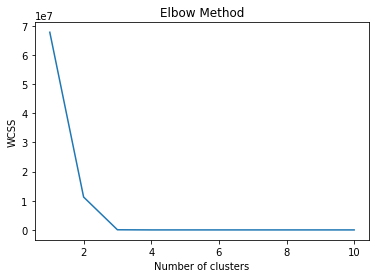

In [92]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3) # Elbow graph shows no of cluster hence taken 3
kmeans.fit(df_new)

KMeans(n_clusters=3)

In [94]:
y_preds=kmeans.predict(df_new)

In [95]:
y_preds

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [96]:
kmeans.cluster_centers_

array([[123.85540637],
       [  0.38731036],
       [248.530125  ]])

In [97]:
unique, counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 2921, 1: 6119, 2: 960}


# Let's Detect Anomaly Using Isolation Forest Algorithm

In [98]:
from sklearn.ensemble import IsolationForest

In [99]:
df_array = df_new['motor_reading'].values.reshape(-1,1)

In [100]:
model = IsolationForest(n_estimators = 100,max_samples = 'auto', contamination=float(0.2), max_features = 1.0)
model.fit(df_array)

IsolationForest(contamination=0.2)

# Fit and predict the model (1 means no anomaly and -1 means Anomaly) in Anomaly column

In [101]:
df_new['anomaly_scores'] = model.decision_function(df_array)
df_new['anomaly'] = model.predict(df_array)
df_new

,motor_reading,anomaly_scores,anomaly
0,0,-0.017085,-1
1,0.1,-0.011748,-1
2,0.2,0.098119,1
3,0.3,0.127189,1
4,0.4,0.136684,1
...,...,...,...
9995,248.958,-0.122672,-1
9996,248.959,-0.123140,-1
9997,128.1255,0.039620,1
9998,0.6117,0.059090,1


# 2000 Anomaly Present as per Isolation Algorithm

In [102]:
df_new['anomaly'].value_counts()

 1    8001
-1    1999
Name: anomaly, dtype: int64

In [103]:
# True means Anomaly Present and False means No Anomaly Present
df_new['anomaly'] == -1

0        True
1        True
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997    False
9998    False
9999    False
Name: anomaly, Length: 10000, dtype: bool

In [104]:
# THANK YOU !!!